In [42]:
import numpy as np
import os
import re
from Corrfunc.utils import convert_rp_pi_counts_to_wp, convert_3d_counts_to_cf

In [43]:
logMh_m = 11.5
logMh_M = 14.5
logMh_bin = 0.02
logMh_N = int((logMh_M - logMh_m) / logMh_bin)

In [44]:
particle = np.loadtxt('./dm_xyz_snap_010_thin.dat')

In [45]:
import pickle
with open('halo_particle_pair_count', 'rb') as f:
    count = pickle.load(f)

calculate the wp

In [47]:
vol = np.pi*(count[0]['rmax']**2 - count[0]['rmin']**2)*1           # delta r pi = 1

In [48]:
boxsize = 2500
NR = 1000_000_000
n = NR / (boxsize**3)
RR = count[0].copy()
RR['npairs'] = (NR*vol*n*2).astype('uint64')            # this has been cross checked to be correct

In [49]:
NDs = np.load('halo_mass_function.npy')

In [51]:
pimax = 140
Nbins = len(RR['npairs'])//pimax

In [52]:
particle.shape

(56617275, 3)

In [33]:
w_ps = []
ND2 = particle.shape[0]
D2R1 = RR.copy()
D2R1['npairs'] = ND2*vol*n*2
R1R2 = RR
for i in range(logMh_N):
    ND1 = NDs[i]
    D1D2 = count[i]

    D1R2 = RR.copy()
    D1R2['npairs'] = ND1*vol*n*2
    
    w_ps.append(convert_rp_pi_counts_to_wp(ND1, ND2, NR, NR, D1D2, D1R2, D2R1, R1R2, pimax=pimax, nrpbins=Nbins))

In [34]:
wp_array = np.zeros(logMh_N, dtype=[('i', int), ('wp', float, Nbins)])
wp_array['i'] = np.arange(1, logMh_N+1)
wp_array['wp'] = w_ps

In [35]:
import matplotlib.pyplot as plt

[]

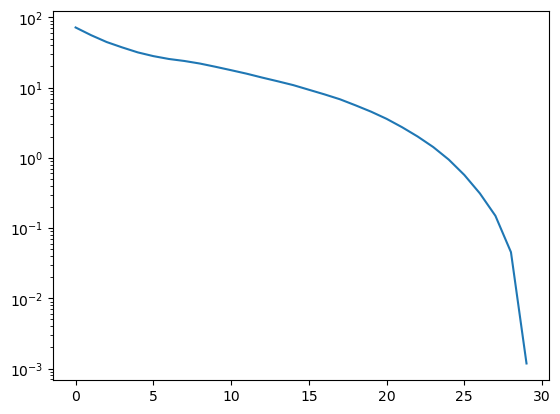

In [36]:
plt.plot(wp_array[0]['wp'])
plt.semilogy()

[]

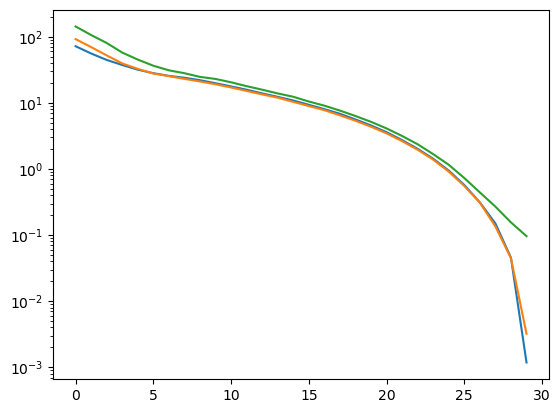

In [37]:
for i in range(0, logMh_N//4, 15):
    plt.plot(wp_array[i]['wp'])
plt.semilogy()

In [38]:
np.save('halo_halo_auto_corr_table', wp_array)
np.save('halo_mass_function', np.array(NDs))

cross check the DR and RR

In [39]:
boxsize = 2500
X = np.random.uniform(0, boxsize, 1_000_000_0)
Y = np.random.uniform(0, boxsize, 1_000_000_0)
Z = np.random.uniform(0, boxsize, 1_000_000_0)

In [40]:
from Corrfunc.theory import DD, DDrppi
sep_min = 0.1
sep_max = 100
sep_N = 30

pimax = 140
boxsize = 2500

r_pbins = np.geomspace(sep_min, sep_max, sep_N+1)

NR = 1000_000_0
n = NR / (boxsize**3)

In [41]:
RR = calc.copy()
RR['npairs'] = (NR*vol*n*2).astype('uint64')
RR_real = DDrppi(1, 40, pimax, r_pbins, X1=X, Y1=Y, Z1=Z, periodic=True, boxsize=boxsize, verbose=False)
RR['npairs']/RR_real['npairs']

NameError: name 'calc' is not defined

In [ ]:
bins = np.arange(logMh_N+1) * logMh_bin + logMh_m
res = np.digitize(np.log10(halos['M_h']), bins)
halos = np.load('main_halo_zspace.npy')
halo1 = halos[res == 1]
DR_real = DDrppi(0, 40, pimax, r_pbins, X1=X, Y1=Y, Z1=Z, X2=halo1['X'], Y2=halo1['Y'], Z2=halo1['Z'], periodic=True, boxsize=boxsize, verbose=False)
D1R2 = RR.copy()
D1R2['npairs'] = len(halo1)*vol*n*2
D1R2['npairs'] / DR_real['npairs']